# UNIVERSIDADE FEDERAL DE SANTA CATARINA – UFSC

**CENTRO DE CIÊNCIAS DA EDUCAÇÃO**

**DEPARTAMENTO DE CIÊNCIA DE INFORMAÇÃO**

**Disciplina de Machine Learning e Deep Learning (PCI 410068 )**

<br>
<br>
<br>
<br>

**Professor: Gustavo Medeiros de Araujo**

**Aluno: Daniel San Martin Pascal Filho**

**Data: 05/11/2018**

<br>
<br>

# Resumo

Este trabalho procura descobrir quais países se assemelham tecnologicamente com base no volume de citações em notícias de portais especializados e redes sociais. O dataset possui informações de 18.116 publicações. Sobre os dados alvos foram aplicados os algorítimos K-means, AgglomerativeClustters e DBSCAN com o propósito de agrupar os países em classes de acordo com suas similaridades tecnológicas. Para o volume analisado todos os algorítimos aprsentaram performance adequada e classes semelhantes.

# Objetivo Geral

O objetivo deste trabalho é encontrar semelhanças do ponto de vista tecnológico entre os países e tecnologias
citados em publicações capturadas de portais e redes sociais por meio de clusterização.

## Objetivos Secundários

Como objetivos secundários deste trabalho, enumenram-se:

1. Analisar o dataset e selecionar adequadamente as *features*.
2. Aplicar algoritmos de clusterização.
3. Visualizar e interpretar os resultados.


# Fundamentação Teórica

## Vigilância Tecnológica

A maior parte das informações sobre tecnologia está dispersa em documentos não estruturados distribuídos em redes sociais, base de patentes, artigos científicos, portais web, entre outros. A variedade de fontes de informação e o grande volume de publicações naturalmente tornam a atividade de monitoramento tecnológico complexa e cara. E com os ciclos de inovação cada vez mais curtos, traçar um panorama tecnológico eficaz é fundamental para que as organizações se mantenham competitivas. 

Como solução, foram criados os sistemas de vigilância tecnológica (VT). Eles são metodos estruturados para monitorar as mudanças tecnológicas tanto nos ambientes interno como externo. Contudo, aplicar a VT de forma manual resolve parcialmente o problema uma vez que na maior parte das vezes as informações de que as empresas precisam caracterizam cenários de Big Data.


## Algoritimos de Clusterização

Os algoritmos de clusterização buscam agrupar os dados de acordo com suas características. Eles representam uma classes de algoritmos de machine learning conhecida como aprendizagem não supervisionada. Neste trabalho serão aplicados três tipos de algoritmos presentes no pacote Sklean do python: K-means, AgglomerativeClustering e DBSCAN.

O *dataset* utizado é resultado do processamento de 18.116 publicações capturadas de portais web especializados e redes sociais pré-processadas para extração de tecnologias chaves destacadas por especialistas para o setor de Móveis e Madeiras o qual é um dos dezesseis Setores Portadores de Futuro para o Estado de Santa Catarina com base no Programa de desenvolvimento industrial catarinense – PDIC 2022, da Federação das Indústrias de Santa Catarina (FIESC).  


# Análises

A seguir, são apresentadas as análises com seus resultados.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('metadados.csv')

df.head()

,weekly,doc_category,doc_source_type,country,term_category,term,count
0,2017-10-09 00:00:00-03,Agroalimentar,News,Brasil,Agroalimentar,Processos,1
1,2017-10-09 00:00:00-03,Agroalimentar,News,México,Agroalimentar,Processos,1
2,2017-10-09 00:00:00-03,CeluloseEPapel,News,China,Celulose e Papel,Sustentabilidade,1
3,2017-10-09 00:00:00-03,CeluloseEPapel,News,Colômbia,Celulose e Papel,Sustentabilidade,1
4,2017-10-09 00:00:00-03,CeluloseEPapel,News,Finlândia,Celulose e Papel,Sustentabilidade,1


## Feature selection

Escolhendo o setor de energia para avaliar.
Somando todas as tecnologias-chaves para considerar apenas as classes.

In [3]:
df2 = df[df['doc_category']=='MoveisEMadeira']
df2 = df2[['country', 'term_category', 'term', 'count']]
df2 = df2.groupby(['country', 'term_category'])['count'].sum()
df2 = df2.reset_index()
df2.head()

,country,term_category,count
0,Alemanha,Madeira para construcao,4
1,Alemanha,Moveis e madeira,5
2,Argentina,Madeira para construcao,2
3,Argentina,Moveis e madeira,2
4,Argentina,Tecnologias da Informacao e Comunicacao,1


Crio uma matriz "Países x Classes de tecnologias" para que cada feature 
de cada país sejam as tecnologias mencionadas nos mesmos documentos em 
que eles apareceram.

In [4]:
countries = df2['country'].drop_duplicates()
categories = df2['term_category'].drop_duplicates()

country_techcategory_df = pd.DataFrame(0, columns=categories, index=countries)
for index, row in df2.iterrows():
   country_techcategory_df.loc[row['country'], row['term_category']] = row['count']

country_techcategory_df.head()

term_category,Madeira para construcao,Moveis e madeira,Tecnologias da Informacao e Comunicacao,Gestao de residuos,Biotecnologia
country,,,,,
Alemanha,4,5,0,0,0
Argentina,2,2,1,0,0
Austrália,0,5,0,3,0
Belize,0,1,0,0,0
Brasil,24,44,7,4,0


## Feature scaling
Normalizo as features (volume de menções de tecnologias com países) para treinar os modelos.

In [6]:
y = countries.reset_index(drop=True)
X = country_techcategory_df.reset_index(drop=True)

from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X.astype(float))

import pprint
print('Features normalizadas:\n')
for i in range(5):
    pprint.pprint(X_scaled[i,:])

Features normalizadas:

array([0.16666667, 0.11363636, 0.        , 0.        , 0.        ])
array([0.08333333, 0.04545455, 0.14285714, 0.        , 0.        ])
array([0.        , 0.11363636, 0.        , 0.12      , 0.        ])
array([0.        , 0.02272727, 0.        , 0.        , 0.        ])
array([1.  , 1.  , 1.  , 0.16, 0.  ])


A seguir, plota-se um gráfico *heatmap* a fim de se perceber melhor o volume de menções.

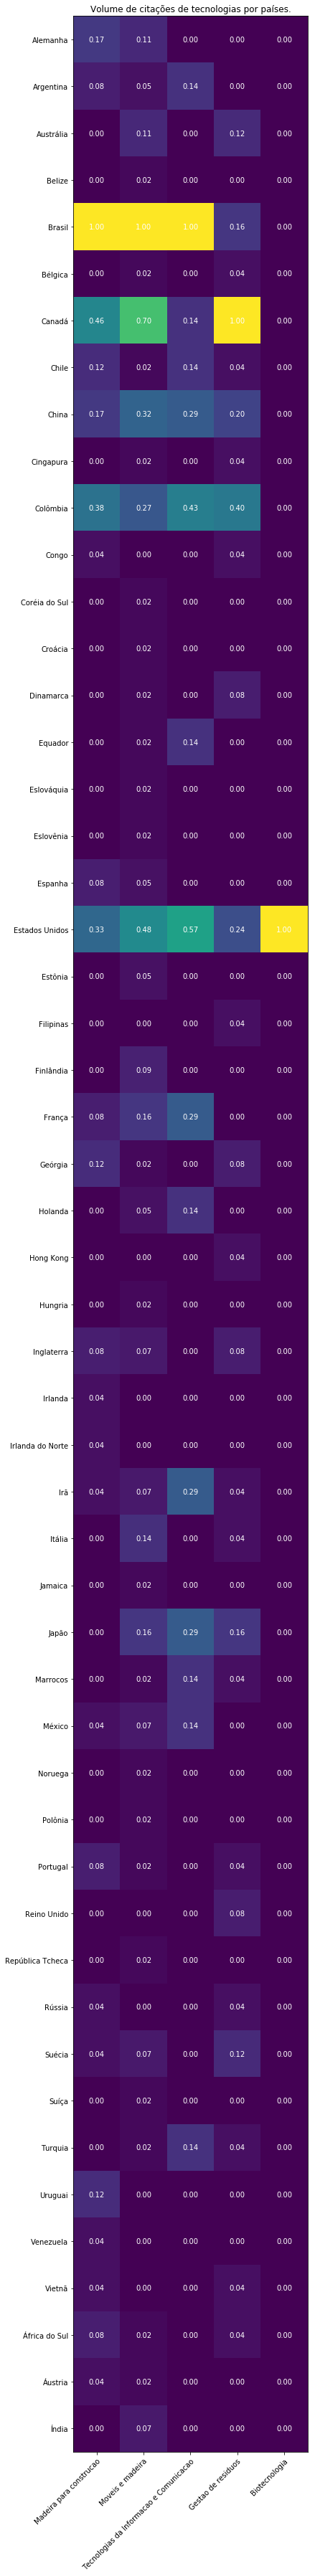

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,50))
im = ax.imshow(X_scaled)


ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(countries)))

ax.set_xticklabels(categories)
ax.set_yticklabels(countries)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Iterando nas dimensões dos dados e criando as anotações textuais.
for i in range(len(countries)):
    for j in range(len(categories)):
        text = ax.text(j, i, ("%.2f" % X_scaled[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Volume de citações de tecnologias por países.")
fig.tight_layout()
plt.show()

No gráfico a seguir os países são apresentados como pontos, estando mais 
próximos aqueles que apresentam volumes de tecnologias similares

No handles with labels found to put in legend.


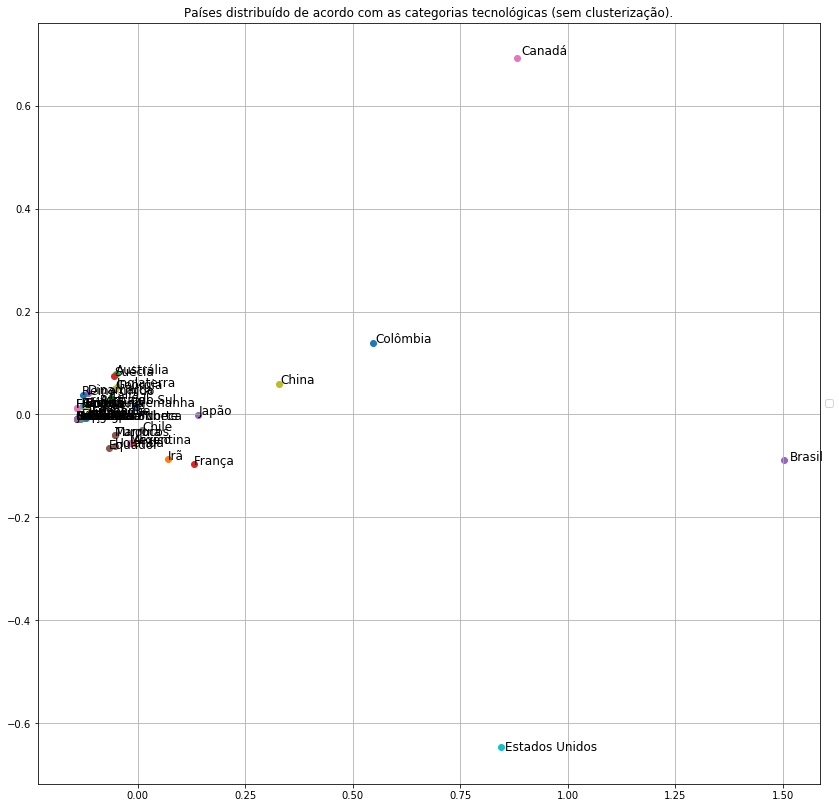

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_scaled))

size = len(X_scaled)
colors = np.random.rand(size)

fig, ax = plt.subplots(figsize=(14,14))

countries_labels = countries.reset_index(drop=True)

for i in range(size):
    plt.text(transformed.loc[i,0] * (1 + 0.01), transformed.loc[i,1] * (1 + 0.01) , countries_labels[i], fontsize=12)
    ax.scatter(transformed.loc[i,0], transformed.loc[i,1])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Países distribuído de acordo com as categorias tecnológicas (sem clusterização).')
ax.grid(True)

plt.show()

## K-MEANS


### Descobrindo o melhor número de cluster (K)

Para cada valor k, incia-se o k-means e utilizando o atributo de inércia são 
identificadas a proximidade dos clustes pela soma das distâncias quadradas.
Dessa forma, a medida em que k aumenta, a soma da distância quadráticas tende a zero.
Neste método, pode-se encontrar o melhor k identificando o ponto central onde o 
gráfico das somas das distâncias quadráticas gerado forma um cotovelo.

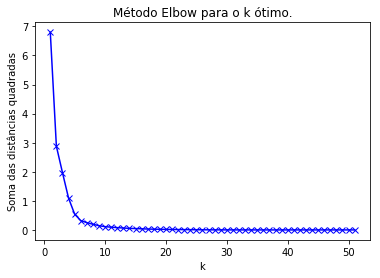

In [19]:
from sklearn.cluster import KMeans
import warnings

total_clusters = len(X_scaled)

Sum_of_squared_distances = []
K = range(1,total_clusters)

# suprimo warnings que podem surgir durante a convergência.
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X_scaled)
        Sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias quadradas')
plt.title('Método Elbow para o k ótimo.')
plt.show()

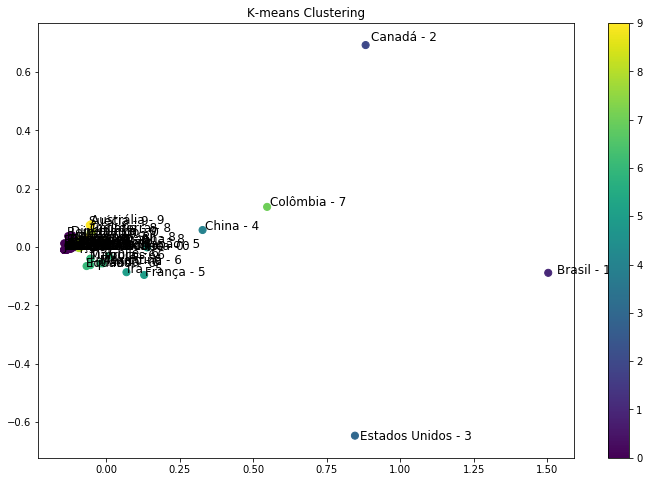

In [86]:
# Pelo gráfico gerado é possível notar que a partir de 20 clusters 
# quase não vemos variação nas somas quadráticas das distâncias.

num_clusters = 10

km = KMeans(n_clusters=num_clusters)
km = km.fit(X_scaled)


# Gráfico
# Plotando os países de acordo com as classes.

from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2) #2-dimensional PCA

clust_labels = pd.DataFrame(km.labels_)

X_reduced = pd.DataFrame(pca.fit_transform(X_scaled))
X_reduced.insert((X_reduced.shape[1]),'clust_labels',clust_labels)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[0],X_reduced[1],
                     c=(clust_labels[0]),s=50)

for i in range(len(X_reduced)):
  ax.text(X_reduced.loc[i,0] * (1 + 0.02), X_reduced.loc[i,1] * (1 + 0.02) , 
          '{} - {}'.format(countries_labels[i], clust_labels[0][i]), fontsize=12)
  
ax.set_title('K-means Clustering')
plt.colorbar(scatter)
plt.show()

A seguir, é apresentado o gráfico das classes obtidas na clusterização.
Decomponho o vetor multidimensional das classes para duas dimensões a fim de 
permitir sua visualização. Como informação adicional, o tamanho dos círculos no gráfico é dimensionado 
de acordo com a quantidade de países que pertecem a cada classse. 

Em síntese, pelo gráfico apresentado observa-se uma boa clusterização.

In [71]:
# Verifico quantos países há em cada classe.

kmeans_item_class_count = clust_labels.groupby([0]).size().sort_values()
kmeans_item_class_count

0
1     1
2     1
3     1
4     1
7     1
8     3
9     3
0     7
5     7
6    27
dtype: int64

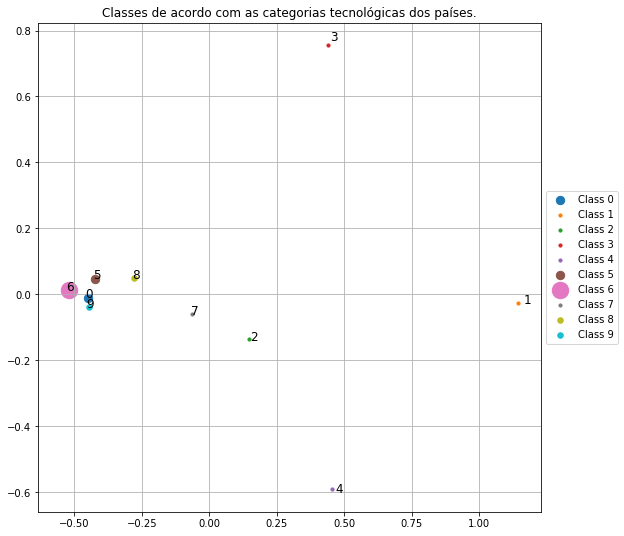

In [72]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2) # PCA para 2 dimensões

centers = km.cluster_centers_

centers_reduced = pd.DataFrame(pca.fit_transform(centers))

colors = np.random.rand(total_clusters)

fig, ax = plt.subplots(figsize=(9,9))
for i in range(num_clusters):
    ax.text(centers_reduced.loc[i,0] * (1 + 0.02), centers_reduced.loc[i,1] * (1 + 0.02) 
            , i, fontsize=12)
    ax.scatter(centers_reduced.loc[i,0], centers_reduced.loc[i,1], 
               label='Class {}'.format(i), s=(kmeans_item_class_count[i]*10))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Classes de acordo com as categorias tecnológicas dos países.')
ax.grid(True)

plt.show()


### Dendograma

Uma outra forma de analisar visualmente o resultado do K-Means é por meio
de um dendograma. O gráfico apresentando a hierarquia entre as classes encontradas é contruído a seguir.

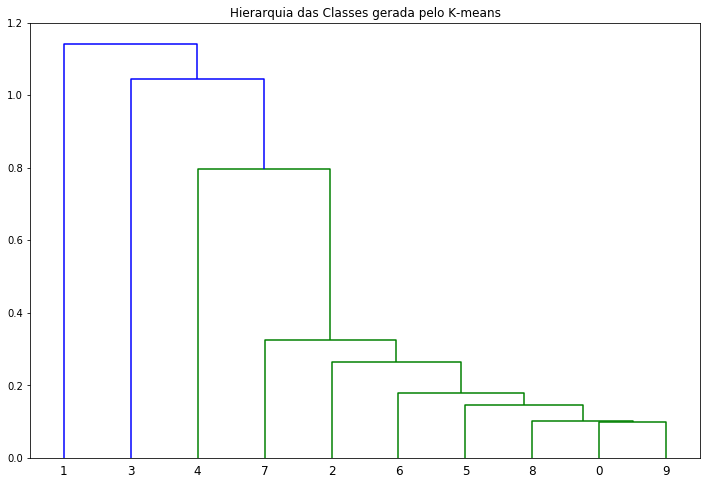

In [41]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

dist_condensed = pdist(centers)
Z = hierarchy.linkage(dist_condensed, 'single')
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z)
plt.title('Hierarquia das Classes gerada pelo K-means')
plt.show()

## Agglomerative Clustering

A seguir realizo uma nova clusterização utilizando o método de Agglomerative Clustering 
que mescla recursivamente pares de clusters na medida em que reduz o incremento da distância de entre eles.

Para fins de facilitar comparações, é mantido o mesmo número de classes utilizado no K-means.

In [82]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 10

model = AgglomerativeClustering(n_clusters=num_clusters, affinity = 'euclidean', linkage = 'ward')
clust_labels = model.fit_predict(X_scaled)
agglomerative_labels = pd.DataFrame(clust_labels)

### Gráfico
O AgglomerativeClustering não retorna a centróide dos clusters, então ploto os pontos com as cores 
de suas classes.

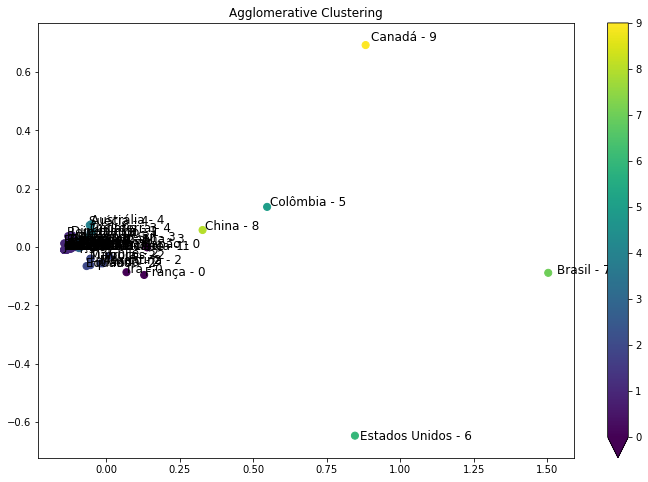

In [87]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2) #2-dimensional PCA

X_reduced = pd.DataFrame(pca.fit_transform(X_scaled))
X_reduced.insert((X_reduced.shape[1]),'agglomerative',agglomerative)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[0],X_reduced[1],
                     c=agglomerative_labels[0], label=agglomerative_labels[0],s=50)

for i in range(len(X_reduced)):
  ax.text(X_reduced.loc[i,0] * (1 + 0.02), X_reduced.loc[i,1] * (1 + 0.02) , 
          '{} - {}'.format(countries_labels[i], agglomerative_labels[0][i]), fontsize=12)

ax.set_title('Agglomerative Clustering')
plt.colorbar(scatter, extend='min')
plt.show()

## DBSCAN

Diferentemente do K-means, mo DBSCAN não é necessário informar o número de clusters durante sua
inicialização. O DB encontra um número adequando de clusters com base na densidade das regiões.


**eps:** a menor distância a ser considerada entre os clusters, já que as
features já foram escaladas, será de 0.1.

**min_samples:** espara-se clusters com apenas um país devido ao grande 
número de menções. Então foi definido como número mínimo de exemplos 1.

Número de classes geradas: 11


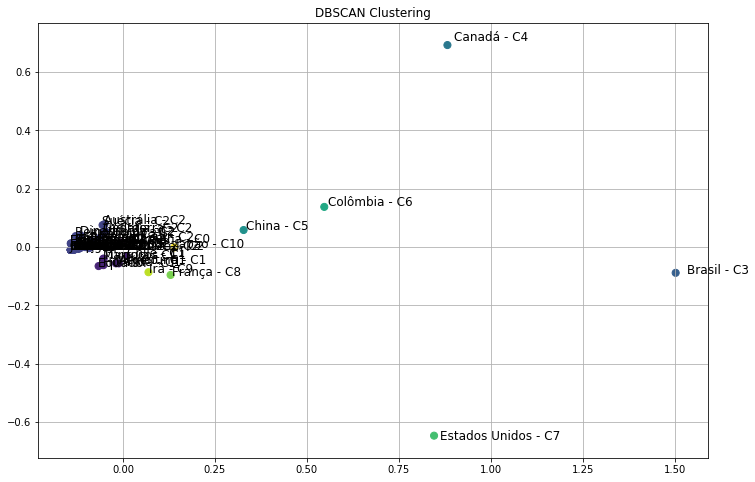

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=1)
dbscan.fit(X_scaled)
print('Número de classes geradas: {}'.format(len(set(dbscan.labels_))))

labels = ['{}'.format(item) for item in dbscan.labels_]
X_reduced = pd.DataFrame(pca.fit_transform(X_scaled))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[0],X_reduced[1],
                    c=dbscan.labels_,s=50)

for i in range(len(X_reduced)):
  ax.text(X_reduced.loc[i,0] * (1 + 0.02), X_reduced.loc[i,1] * (1 + 0.02) , 
          '{} - C{}'.format(graph_labels[i], dbscan.labels_[i]), fontsize=12)

ax.grid(True)
ax.set_title('DBSCAN Clustering')
plt.show()

## Análise comparativa

Os resultados das clusterizações são comparadas a seguir. Para isso, serão 
contabilizadas sa quantidades de países elencados em cada classe dos algoritimos.

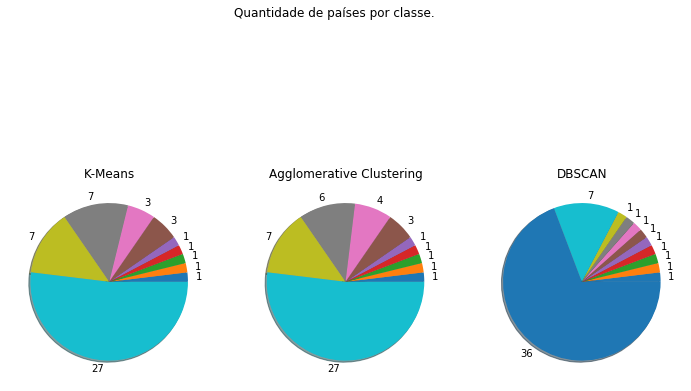

In [112]:
agglomerative_item_class_count = agglomerative_labels.groupby([0]).size().sort_values()

dbscan_item_class_count = pd.DataFrame(dbscan.labels_).groupby([0]).size().sort_values()

fig, axs = plt.subplots(1,3, figsize=(12, 8))
fig.suptitle('Quantidade de países por classe.')

k_values = kmeans_item_class_count.values
axs[0].pie(k_values, labels=k_values,shadow=True)
axs[0].set_title('K-Means')

a_values = agglomerative_item_class_count.values
axs[1].pie(a_values, labels=a_values,shadow=True)
axs[1].set_title('Agglomerative Clustering')

d_values = dbscan_item_class_count.values
axs[2].pie(d_values, labels=d_values,shadow=True)
axs[2].set_title('DBSCAN')

plt.show()

# Conclusão 

Neste trabalho, foi analisado o *dataset* composto por informações extraídas de dados não estruturados de publicações e redes sociais. Foi escolhido o setor de Moveis Madeira do qual foram selecionadas e adptadas as *features* para a realização das análises.
Em seguida foram aplicados algoritmos de clusterização para encontrar países semelhantes tecnológicamente e geradas visualizações para interpretar os resultados. Pelo gráfico que apresenta a quantidade de países por classe encontradas pelos algoritmos de classificação, é possível concluir que o K-means e o Agglomerative Clustering ofereceram resultados semelhantes, o que pode ser resultado de ambos utilizarem a distância entre pontos em suas concepções.

Po outro lado, o DBSCAN apresentou uma maior variação em relação aos outros dois. O DBSCAN leva em conta a distância entre os pontos mais próximos, ou seja, a vizinhança. Um dos motivos da menor semelhança com os resultados dos demais é que o algoritmo DBSCAN considera a diferença entre as densidades dos clusters. Com isso, o DBSCAN pode encontrar clusters em dimensões não geométricas com mais facilidade, diferentemente do K-means que assume que os clusters são convexos. De todo o modo, o DBSCAN encontrou uma quantidade de classes/clusters semelhante aos outros algoritmos.